In [4]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import umap
from sklearn.cluster import KMeans
from config import FEATURE_DATA_OUTPUT_PATH

In [5]:
with open(FEATURE_DATA_OUTPUT_PATH, 'rb') as f:
    feature_data = pickle.load(f)

In [9]:
# UMAP (3D)
def run_umap(data, n_components=3, n_neighbors=15, min_dist=0.1, random_state=42):
    reducer = umap.UMAP(n_components=n_components, n_neighbors=n_neighbors, min_dist=min_dist, random_state=random_state)
    return reducer.fit_transform(data)

# Elbow Method to Find Optimal k
def find_optimal_clusters(data, max_k=50):
    inertia = []
    k_values = range(2, max_k + 1)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)

    # Plot the Elbow Method graph
    plt.figure(figsize=(8, 6))
    plt.plot(k_values, inertia, marker='o', linestyle='--')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
    plt.title("Elbow Method for Optimal k")
    plt.show()

    # Find the elbow point manually (or select visually)
    optimal_k = int(input("Enter the best k from the elbow graph: "))
    return optimal_k

def cluster_kmeans(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    return kmeans.fit_predict(data)

# 3D Plot
def plot_3d_clusters(data, labels, title):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], 
                         c=labels, cmap='Spectral', s=5, alpha=0.6)

    ax.set_title(title)
    ax.set_xlabel("UMAP Dimension 1")
    ax.set_ylabel("UMAP Dimension 2")
    ax.set_zlabel("UMAP Dimension 3")
    fig.colorbar(scatter, ax=ax, label="Cluster Label")

    ax.view_init(elev=30, azim=45)  # Sets a default angle

    plt.show()

def main(mode, optimal_k=None):
    # Extract Features
    features = np.array([entry[mode] for entry in feature_data])
    umap_3d = run_umap(features)
    # Determine k and Run KMeans
    if optimal_k is None:
        optimal_k = find_optimal_clusters(umap_3d)

    labels_3d = cluster_kmeans(umap_3d, optimal_k)

    # 3D Plot with optimized K-value
    plot_3d_clusters(umap_3d, labels_3d, title=f"3D UMAP with KMeans on {mode} (k={optimal_k})")

c:\Users\niki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\niki\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


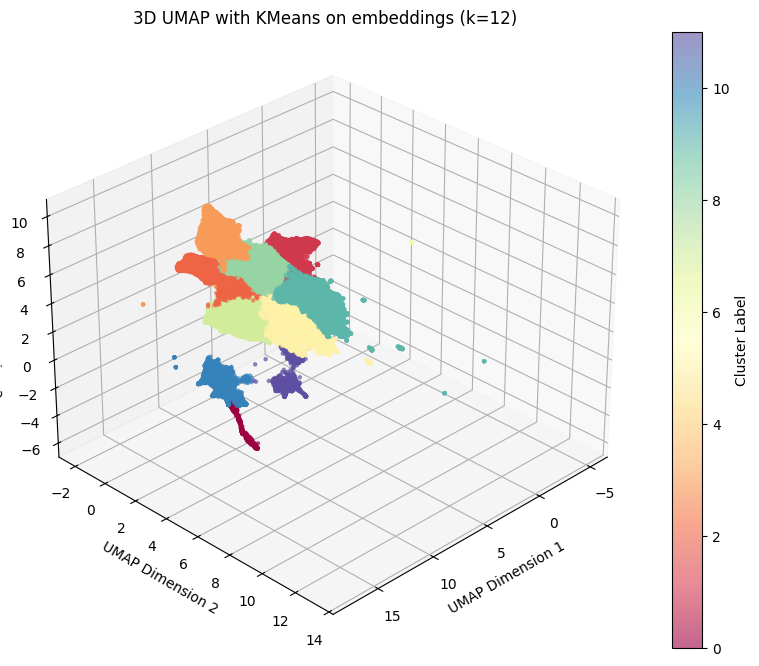

In [10]:
main("embeddings", optimal_k=12)

c:\Users\niki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\niki\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


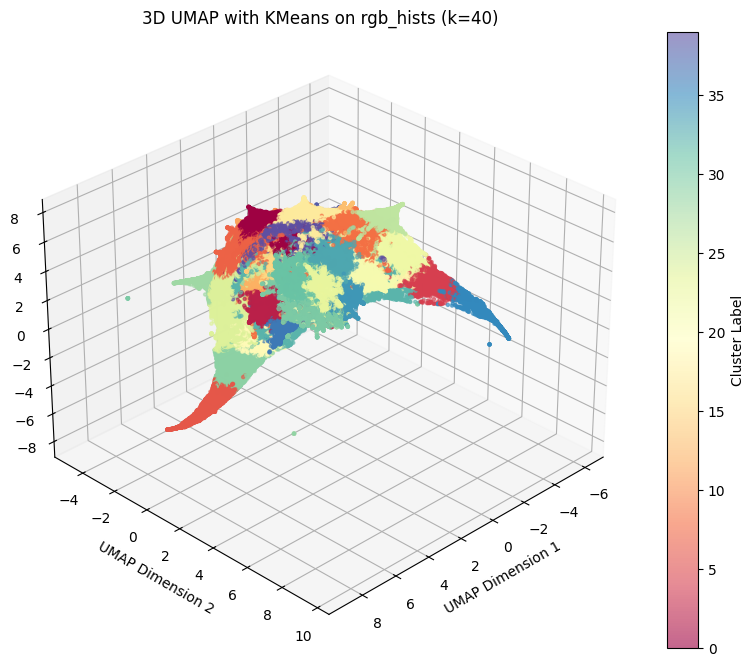

In [ ]:
def main(mode, optimal_k=None):
    # Extract Features
    features = np.array([entry[mode] for entry in feature_data])

    labels_3d = cluster_kmeans(features, optimal_k)

    umap_3d = run_umap(features)


    # 3D Plot with optimized K-value
    plot_3d_clusters(umap_3d, labels_3d, title=f"3D UMAP with KMeans on {mode} (k={optimal_k})")
main("embeddings", 40)

c:\Users\niki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\niki\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


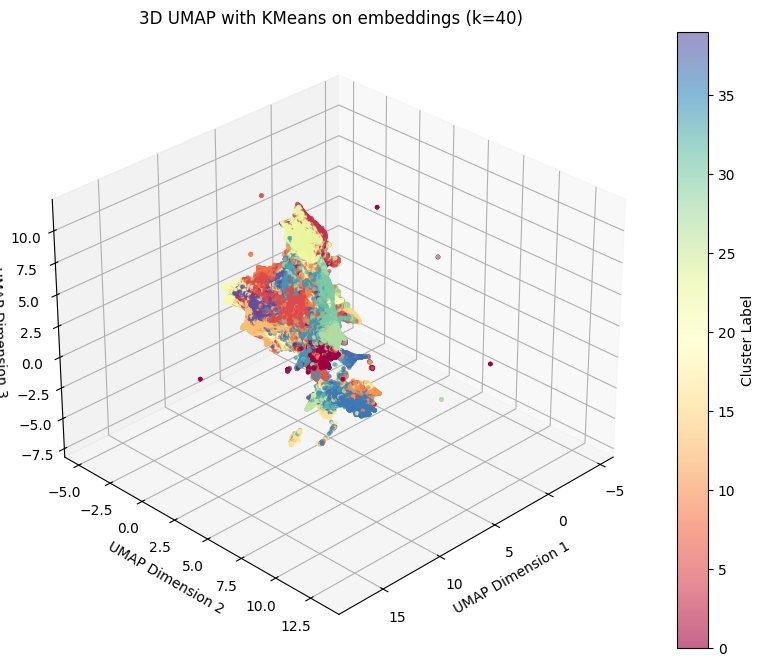

In [8]:
def main(mode, optimal_k=None):
    # Extract Features
    features = np.array([entry[mode] for entry in feature_data])

    labels_3d = cluster_kmeans(features, optimal_k)

    umap_3d = run_umap(features)


    # 3D Plot with optimized K-value
    plot_3d_clusters(umap_3d, labels_3d, title=f"3D UMAP with KMeans on {mode} (k={optimal_k})")
main("embeddings", 40)